In [1]:
%pylab
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn3, venn2

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("out/df_filt.csv", index_col=0)
df = df[df.sum(1)!=0]  # drop empty rows
df.head()

,H1-PelletTriflic-Fl-R1,H1-PelletTriflic-Fl-R2,H1-PelletTriflic-Fl-R3,H1-SonicSupTriflic-V2-R1,H1-SonicSupTriflic-V2-R2,H1-SonicSupTriflic-V2-R3,H1-wholetriflic-R1,H1-wholetriflic-R2,H1-wholetriflic-R3
202956,9,7,6,9,10,11,13,10,11
209005,32,33,34,15,15,19,25,31,34
217964,2,2,3,0,0,0,6,5,6
248190,3,1,3,0,0,0,3,5,5
251275,8,3,2,0,0,0,3,3,6


In [3]:
df.shape

(8083, 9)

In [4]:
# venn where a protein cluster is selected if it is in >=1 sample per group
df['H1-PelletTriflic'] = df['H1-PelletTriflic-Fl-R1'] + df['H1-PelletTriflic-Fl-R2'] + df['H1-PelletTriflic-Fl-R3']
df['H1-SonicSupTriflic'] = df['H1-SonicSupTriflic-V2-R1'] + df['H1-SonicSupTriflic-V2-R2'] + df['H1-SonicSupTriflic-V2-R3']
df['H1-wholetriflic'] = df['H1-wholetriflic-R1'] + df['H1-wholetriflic-R2'] + df['H1-wholetriflic-R3']
df.head()

,H1-PelletTriflic-Fl-R1,H1-PelletTriflic-Fl-R2,H1-PelletTriflic-Fl-R3,H1-SonicSupTriflic-V2-R1,H1-SonicSupTriflic-V2-R2,H1-SonicSupTriflic-V2-R3,H1-wholetriflic-R1,H1-wholetriflic-R2,H1-wholetriflic-R3,H1-PelletTriflic,H1-SonicSupTriflic,H1-wholetriflic
202956,9,7,6,9,10,11,13,10,11,22,30,34
209005,32,33,34,15,15,19,25,31,34,99,49,90
217964,2,2,3,0,0,0,6,5,6,7,0,17
248190,3,1,3,0,0,0,3,5,5,7,0,13
251275,8,3,2,0,0,0,3,3,6,13,0,12


In [5]:
pt = set(df[df['H1-PelletTriflic']>0].index)
sst = set(df[df['H1-SonicSupTriflic']>0].index)
wt = set(df[df['H1-wholetriflic']>0].index)

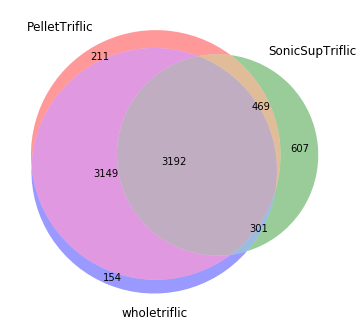

In [6]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn3([pt,sst,wt], ["PelletTriflic", "SonicSupTriflic", "wholetriflic"])
plt.savefig("venn.pdf")